# 4. What is the longest match recorded in terms of duration?

In [16]:
import pandas as pd

MatchTimeInfo = pd.read_csv(r"E:\Data Analysis Course\Data analyse\tennis_data_analysis\data\raw\MatchTimeInfo.csv")
MatchTimeInfo.head(5)
MatchTimeInfo = MatchTimeInfo.drop_duplicates(subset="match_id")
# Calculate the total duration of each match by summing the periods
MatchTimeInfo['total_duration'] = MatchTimeInfo[['period_1', 'period_2', 'period_3', 'period_4', 'period_5']].sum(axis=1)
MatchTimeInfo = MatchTimeInfo[MatchTimeInfo['total_duration'] > 0]
MatchTimeInfo['total_duration_hours'] = MatchTimeInfo['total_duration'] / 3600
# Perform a sanity check by filtering out any unreasonably long matches (e.g., > 24 hours)
reasonable_matches = MatchTimeInfo[MatchTimeInfo['total_duration'] <= 12*3600]
# Find the match with the longest duration
longest_match = reasonable_matches.loc[reasonable_matches['total_duration'].idxmax()]
longest_match_hours = longest_match/3600
print("Longest match recorded in terms of duration:")
print(f"Match ID: {longest_match['match_id']}")
print(f"Duration: {longest_match['total_duration']} seconds, equal to {longest_match_hours['total_duration']} hours" )



Longest match recorded in terms of duration:
Match ID: 12346456.0
Duration: 30465.0 seconds, equal to 8.4625 hours


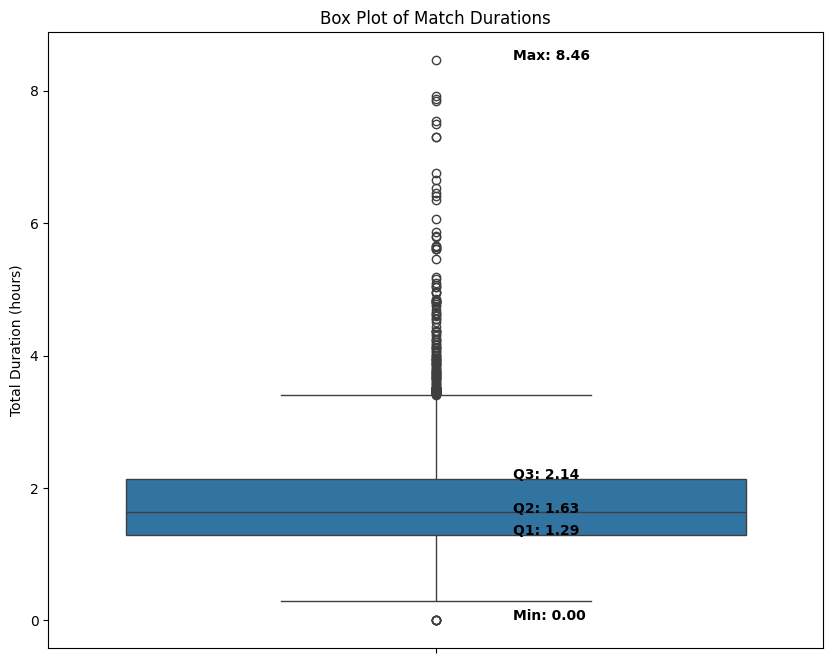

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate quartiles, min, and max
Q1 = reasonable_matches['total_duration_hours'].quantile(0.25)
Q2 = reasonable_matches['total_duration_hours'].median()
Q3 = reasonable_matches['total_duration_hours'].quantile(0.75)
min_val = reasonable_matches['total_duration_hours'].min()
max_val = reasonable_matches['total_duration_hours'].max()

# Create a box plot for the total duration in hours
plt.figure(figsize=(10, 8))
sns.boxplot(y=reasonable_matches['total_duration_hours'])

# Annotate the quartiles, min, and max
plt.text(0.1, Q1, f'Q1: {Q1:.2f}', horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(0.1, Q2, f'Q2: {Q2:.2f}', horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(0.1, Q3, f'Q3: {Q3:.2f}', horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(0.1, min_val, f'Min: {min_val:.2f}', horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(0.1, max_val, f'Max: {max_val:.2f}', horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('Box Plot of Match Durations')
plt.ylabel('Total Duration (hours)')
plt.show()